# Statistics & Probability in Python

A branch of mathematics dealing with the collection, analysis, interpretation, presentation and organization of data.

## Central Tendency
The *mean, median, mode* are the three statistical measures for analyzing the __central tendency__ of data. These measures are used to find the central value of the data to summarize the entire data set. There are three additional measures of central tendency: the *trimean*, the *geometric mean*, and the *trimmed mean*.

### Mean $(\bar x)$
The **mean** or **average** is the one number that best represents all these data points.

$$\bar x=\frac{x_1+x_2+...+x_n}{n}$$

### Median
The __median__ is the value separating the higher half from the lower half of a data sample (a population or a probability distribution). For a data set, it may be thought of as the "middle" value. The basic advantage of the median in describing data compared to the mean is that it is not skewed so much by extremely large or small values.

<div class="alert alert-info">The mean and the median are the same for symmetric distributions.</div>

### Mode
The __mode__ of a set of data values is the value that appears most often. It is the value x at which its probability mass function takes its maximum value. In other words, it is the value that is most likely to be sampled.

<div class="alert alert-info">The mean of the dataset would always change if there is a change in any value of the dataset. Median and mode may or may not change with altering a single value in the dataset.</div>

### Trimean
The __trimean__ is a weighted average of the 25th percentile, the 50th percentile, and the 75th percentile. Letting $P_{25}$ be the 25th percentile, $P_{50}$ be the 50th and $P_{75}$ be the 75th percentile, the formula for the trimean is:
$$Trimean=\frac{P_{25}+2P_{50}+P_{75}}{4}$$

The median $P_{50}$ is weighted twice as much as the 25th and 75th percentiles.

### Geometric mean
The __geometric mean__ is computed by multiplying all the numbers together and then taking the nth root of the product. For example, for the numbers 1, 10, and 100, the product of all the numbers is: 1 x 10 x 100 = 1,000. Since there are three numbers, we take the cubed root of the product (1,000) which is equal to 10. The formula for the geometric mean is:
$$Geometric Mean=(\Pi x)^{\frac{1}{N}}$$
where the symbol $\Pi$ means to multiply.

### Trimmed mean
__Trimmed mean__ is obtained by removing some of the higher and lower scores and compute the mean of the remaining scores. A mean trimmed 10% is a mean computed with 10% of the scores trimmed off: 5% from the bottom and 5% from the top. A mean trimmed 50% is computed by trimming the upper 25% of the scores and the lower 25% of the scores and computing the mean of the remaining scores. The trimmed mean is similar to the median which, in essence, trims the upper 49+% and the lower 49+% of the scores. Therefore the trimmed mean is a hybrid of the mean and the median. 

                              CENTRAL TENDENCY METRICS                                    

| Mean: 20.45                   Median: 20.0                              Mode: 18 |
| -------------------------------------------------------------------------------- |
| Trimean: 19.5                 Trimmed Mean: 20.16           Geometric Mean: 19.1 |

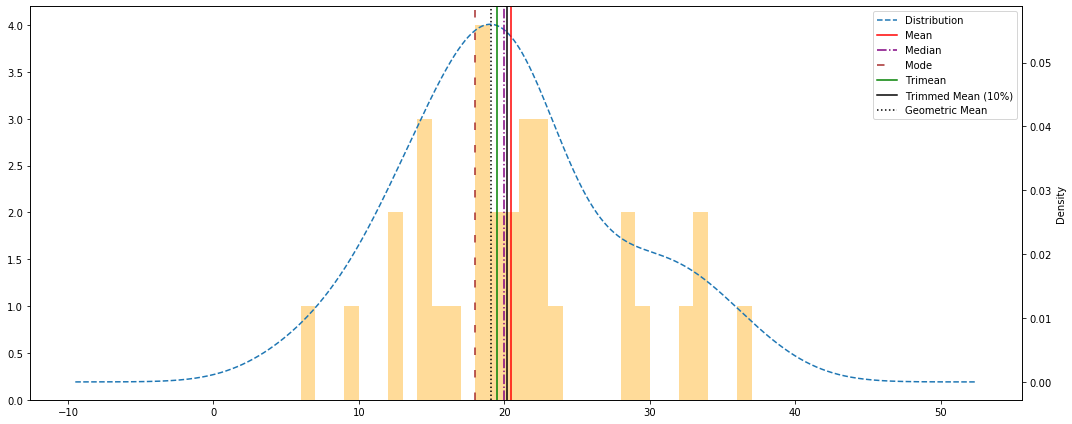

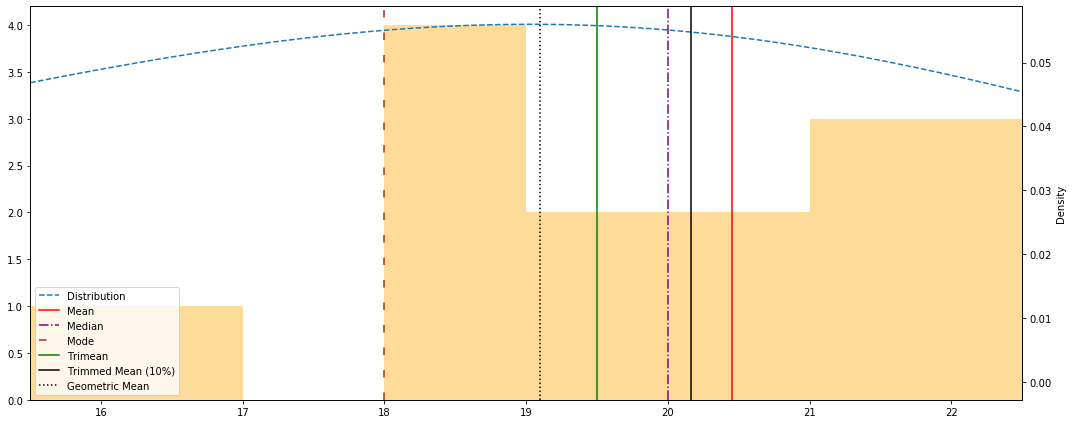

In [1]:
import numpy as np
import statistics
from scipy import stats
import warnings; 
warnings.simplefilter('ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

class Central_Tendency():
    
    def __init__(self,input_list):
        self.input_list=input_list
            
    def get_percentile(self,p):
        return round(np.percentile(self.input_list,p),2)
            
    def get_trimean(self,return_percentiles=False):
        p25=self.get_percentile(25)
        p50=self.get_percentile(50)
        p75=self.get_percentile(75)
        tm=(p25+2*p50+p75)/4.0
        if return_percentiles:
            return round(tm,2),p25,p50,p75
        return round(tm,2)
        
    def get_trimmed_mean(self, trim_by=0.1):
        return round(stats.trim_mean(self.input_list, trim_by),2)

    def get_geometric_mean(self):
        return round(stats.mstats.gmean(self.input_list),2)
    
    def get_mean(self):
        return round(np.mean(self.input_list),2)

    def get_median(self):
        return round(np.median(self.input_list),2)

    def get_mode(self):
        return round(statistics.mode(self.input_list),2)
    
    def display_plot(self,zoom=False):
        fig,ax=plt.subplots(figsize=(15,6))
        ax1=ax.twinx()
        ax.hist(self.input_list,alpha=0.4,bins=len(l),color='orange')
        if zoom:
            pd.Series(self.input_list).plot(kind='kde',ax=ax1,label='Distribution',ls='--',xlim=(self.get_percentile(25),self.get_percentile(75)))
            ax.set_xlim(self.get_percentile(25),self.get_percentile(75))
        else:
            pd.Series(self.input_list).plot(kind='kde',ax=ax1,label='Distribution',ls='--')            
        plt.axvline(self.get_mean(),color='red',label='Mean')
        plt.axvline(self.get_median(),color='purple',label='Median',ls='-.')
        plt.axvline(self.get_mode(),color='brown',label='Mode',ls=(0, (5, 10)))
        plt.axvline(self.get_trimean(),color='green',label='Trimean')
        plt.axvline(self.get_trimmed_mean(),color='black',label='Trimmed Mean (10%)')
        plt.axvline(self.get_geometric_mean(),color='black',label='Geometric Mean',ls=':')
        plt.legend()
        plt.tight_layout()
        
        
    def __repr__(self):
        self.display_plot()
        self.display_plot(zoom=True)
        return '{:30}{:40}{:20}\n\n| {:30}{:20}{:>30} |\n| {:30}{:20}{:30} |\n| {:30}{:20}{:>30} |'.\
    format(' '*30,'CENTRAL TENDENCY METRICS',' '*20,'Mean: '+str(self.get_mean()),'Median: '+str(self.get_median()),
           'Mode: '+str(self.get_mode()),'-'*30,'-'*20,'-'*30,'Trimean: '+str(self.get_trimean()),
           'Trimmed Mean: '+str(self.get_trimmed_mean(0.1)),'Geometric Mean: '+str(self.get_geometric_mean()))

if __name__=='__main__':
    l=[37, 33, 33, 32, 29, 28, 28, 23, 22, 22, 22, 21, 21, 21, 20, 20, 19, 19, 18, 18, 18, 18, 16, 15, 14, 14, 14, 12, 12, 9, 6]
    ct_1=Central_Tendency(l)

ct_1 

## Variability
![line](imgs/line.PNG)
### Range
The **Range** describes the extent of variability by considering the distance between the biggest and the smallest values. The larger the range, the more noticeable the variation in the data will be. However, the greatest disadvantage is that it ignores the mean, and is swayed by the outliers; that's where variance comes in.
$$range=x_{max}-x_{min}$$

### Mean Deviation
For Variance, we first calculate __Mean Deviation__ and __Squared Mean Deviation__:

$$Mean\ Deviation=x_i-\bar x$$

$$Squared\ Mean\ Deviation=(x_i-\bar x)^2$$

The sum of mean deviations of the individual will always be 0.

### Variance $(\sigma^2)$ 

__Variance__ is the second-most important number to summarize this set of data points. It is the mean squared deviation of a variable from its mean. The higher the variance, the larger the variability of the data.

$$Variance=\frac{\sum (x_i-\bar x)^2}{n-1}$$

|![wh](imgs/head.png)|![wh](imgs/head.png)|
|-|-|
|![var1](imgs/var1.PNG)|![var2](imgs/var2.PNG)|

Variance is improved by tweaking the denominator - this is called __Bessel's Correction__.

Variance Properties:
* If a constant is added to each data point, the variance remains the same. Adding a constant shifts the distribution and doesn't affect variability of the data. The deviations from the mean remains the same as well.
* If a constant is multiplied to each observation, the standard deviation increases proportionally to the constant and the variance increases to the squared constant.

### Standard Deviation $(\sigma)$
Mean and variance succinctly summarize a set of numbers. __Standard Deviation__ is the square root of Variance.

$$Std Dev=\sqrt{\frac{\sum (x_i-\bar x)^2}{n-1}}$$

Standard Deviation is the most common way to estimate the uncertainity of a set of outcomes.

![std1](imgs/std1.PNG)

### Percentile Rank
A __percentile rank__ is typically defined as the proportion of scores in a distribution that a specific score is greater than or equal to. For instance, if there is a score of 95 on a math test and this score was greater than or equal to the scores of 88% of the students taking the test, then the percentile rank would be 88 (88th percentile). Alternatively, percentile rank is sometimes defined simply as the proportion of a distribution that a score is greater than.

## Frequency Distribution

The distribution of empirical data is called a __frequency distribution__ and consists of a count of the number of occurrences of each value. If the data are continuous, then a grouped frequency distribution is used. Typically, a distribution is portrayed using a frequency polygon or a histogram. Mathematical equations are often used to define distributions. The normal distribution is, perhaps, the best known example.

A __grouped frequency distribution__ is a frequency distribution in which frequencies are displayed for ranges of data rather than for individual values. For example, the distribution of heights might be calculated by defining one-inch ranges. The frequency of individuals with various heights rounded off to the nearest inch would then be tabulated.

A __histogram__ and a __frequency polygon__ are the graphical representations of a distribution. They partition the variable on the x-axis into various contiguous class intervals of (usually) equal widths. The heights of the _bars_ in a histogram and the _polygon's points_ in a frequency polygon represent the class frequencies.

|![wh](imgs/head.png)|![wh](imgs/head.png)|
|-|-|
|![hist](imgs/hist.PNG)|![fp](imgs/fp.PNG)|

## Gaussian Distribution

Properties in the real world can be represented by a normal distribution, also known as __Gaussian Distribution__ or the __Bell Curve__. Normal distributions do not necessarily have the same means and standard deviations. A normal distribution with a mean of 0 and a standard deviation of 1 is called a __standard normal distribution__.

$$N(\mu,\sigma)=\frac{1}{\sqrt {2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

![ga](imgs/ga.PNG)

|![wh](imgs/head.png)|![wh](imgs/head.png)|![wh](imgs/head.png)|
|-|-|-|
|![g1](imgs/g1.PNG)|![g2](imgs/g2.PNG)|![g3](imgs/g3.PNG)|

* Normal distributions are symmetric around their mean.
* The mean, median, and mode of a normal distribution are equal.
* The area under the normal curve is equal to 1.
* Normal distributions are denser in the center and less dense in the tails. There will be a large number of points close to the average. There will be few extreme values - the number of extreme values at either side of the mean will be the same. 

### z-Score
A value from any normal distribution can be transformed into its corresponding value on a standard normal distribution using the following formula:

$$z=\frac{x-\mu}{\sigma}$$

In other words, __z-score__ is determined in order to normalize the data or standardizing the distribution. The standard normal distribution is sometimes called the __z distribution__. A z score always reflects the number of standard deviations above or below the mean a particular score is.

![zs](imgs/zs.PNG)

### Modality
The __modality__ of a distribution is determined by the number of peaks the data presents.
![modality](imgs/modality.PNG)
* Most distributions are __Unimodal__ which means it has only one frequently occurring score, clustered at the top while a bimodal has two values occurring frequently.
* A __Bimodal distribution__ is a continuous probability distribution with two different modes. These appear as distinct peaks (local maxima) in the probability density function.
* A __Uniform Distribution__ has a single value which only occurs in a certain range while anything outside that range is just 0. It’s very much an “on or off” distribution. It as an indication of a categorical variable with 2 categories: 0 or the value. The categorical variable might have multiple values other than 0 and it can be visualized in the same way as a piecewise function of multiple uniform distributions.

### Example:
 A random male is selected from the population having 186 cm of height. 
 * What percentage of the men will be shorter than this individual?
 * Which height are 83% of men?
 * What about the likelihood of choosing someone who is 186 cm?

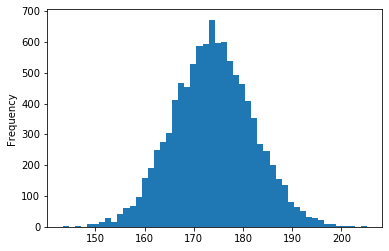

In [2]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

normal_data = stats.norm.rvs(size=10000, loc=174, scale=8.2, random_state=0)
# size is the number of points generated (population), loc is the mean height and scale is the standard deviation in height.

pd.Series(normal_data).plot(kind="hist", bins=50);

**Cumulative distribution function: cdf()** returns the probability of a certain random observation having a lower value than the input value.

In [3]:
# Cumulative distribution function: cdf()
stats.norm.cdf(x=186,         # value
               loc=174,       # Mean
               scale=8.2)     # Standard Deviation

# Result: Around 93% of men will be shorter.

0.9283230216395894

**Percent Point Function: ppf()** is the opposite of cdf(), returns a value by taking quantile as input.

In [4]:
# Percent point function: ppf()
stats.norm.ppf(q=0.83,      # quantile
               loc=174,     # Mean
               scale=8.2)   # Standard Deviation

# Result: 83% of men measure less than 181 cm.

181.82415507579879

**Probability density function: pdf()** gives the likelihood of a random variable assuming a certain value.

In [5]:
# Probability density function: pdf()
stats.norm.pdf(x=186,         # Value to check
               loc=174,       # Distribution start
               scale=8.2)     # Distribution end

# Result: There is a probability of 1.6% to select a person having height 186cm

0.016674679909584385

## Sampling, Central Limit Theorem
__Inferential Statistics__ is the branch of statistics concerned with drawing conclusions about a population from a sample. This is generally done through random sampling, followed by inferences made about central tendency, or any of a number of other aspects of a distribution. A __population__ is the complete set of observations. In contrast, a __sample__ is a subset of a population. A sample has to be representative to reflect properties of general population. There are different sampling methods of selecting a subset of a population for the purposes of statistical inference.
* In __random sampling__, every member of the population is equally likely to be chosen. 
* In __stratified random sampling__, the population is divided into a number of subgroups (or strata). Random samples are then taken from each subgroup with sample sizes proportional to the size of the subgroup in the population. For instance, if a population contained equal numbers of men and women, and the variable of interest is suspected to vary by gender, one might conduct stratified random sampling to insure a representative sample.
* In __Cluster sampling__, divide the population into groups (clusters). Then a random sample is chosen from the clusters. It’s used when researchers don’t know the individuals in a population but do know the population subsets or groups.

A __representative sample__ is a sample chosen to match the qualities of the population from which it is drawn. With a large sample size, random sampling will approximate a representative sample; stratified random sampling can be used to make a small sample more representative.

A sampling method is __biased__ if each element does not have an equal chance of being selected. For example, a sample of internet users found reading an online statistics book would be a biased sample of all internet users. A random sample is unbiased in nature. Note that possible bias refers to the sampling method, not the result. An unbiased method could, by chance, lead to a very non-representative sample. 

An estimator is biased if it systematically overestimates or underestimates the parameter it is estimating. In other words, it is biased if the mean of the sampling distribution of the statistic is not the paramter it is estimating, The sample mean is an unbiased estimate of the population mean. The mean squared deviation of sample scores from their mean is a biased estimate of the variance since it tends to underestimate the population variance.

|![clt](imgs/clt.PNG)|![clt1](imgs/clt1.PNG)|
|-|-|

The __Central Limit Theorem__ states that given a distribution with a mean μ and variance σ², the sampling distribution of the mean $\mu_{\bar x}$ approaches a normal distribution with a mean $\mu$ and a variance $\sigma^2/n$ as $n$, the sample size, increases. The amazing and counter-intuitive thing about the central limit theorem is that no matter what the shape of the original distribution, the sampling distribution of the mean approaches a normal distribution. Furthermore, for most distributions, a normal distribution is approached very quickly as $n$ increases. Keep in mind that $n$ is the sample size for each mean and not the number of samples. Remember in a sampling distribution the number of samples is assumed to be infinite. The sample size is the number of scores in each sample; it is the number of scores that goes into the computation of each mean.

Visualize the Central Limit Theorem:
http://onlinestatbook.com/stat_sim/sampling_dist/index.html

The mean of the sampling distribution of the difference between means is:

$$\mu_{m_1-m_2}=\mu_1-\mu_2$$

which says that the mean of the distribution of differences between sample means is equal to the difference between population means for distributions $m_1$, $m_2$. For example, say that the mean test score of all 12-year-olds in a population is 34 and the mean of 10-year-olds is 25. If numerous samples were taken from each age group and the mean difference computed each time, the mean of these numerous differences between sample means would be 34 - 25 = 9.

### Business Case Scenarios

#### Challenge_1:
A business client has requested a large freight to be transported urgently from Denver to Salt City. When asked about the weights they could not supply the exact weight, however they have specified that there are a total of 36 boxes. From prior experience from this client, the type of cargo follows a distribution with a mean of 72 lb (or 32.66 kg) and a std. dev. of 3 lb (or 1.36 kg). The plane can carry a max cargo weight of 2630 lb (or 1193 kg).

Based on this information, what is the probability that all of the cargo can be safely loaded onto the plane and transported?

#### Solution_1: 
$$\mu_{\bar x}=\mu=72$$


$$\sigma_{\bar x}=\frac{\sigma}{\sqrt n}=\frac{\sigma}{\sqrt 36}=\frac{3}{6}=0.5$$


$$Plane\ Capacity=2640\ lb$$


$$x_{crit}=\frac{2640\ lb}{36\ boxes}=73.06\ lb/box$$


$$z=\frac{x_{crit}-\mu_{\bar x}}{\sigma_{\bar x}}=\frac{73.06-72}{0.5}=2.12$$

$$Using\ z\ table: P(x<x_{crit})=0.9830=98.3\%$$

#### Challenge:_2
The team of traders earns profit which can be approximated with a Laplace distribution. Profits have a mean of $95.70$ and std. dev. of $1247$. There are about 100 trades every week.
* What is the probability of making over \$20000 in any given week?
* What is the probability of making a loss in any given week?

#### Solution_2: 
|![head](imgs/head.png)|![head](imgs/head.png)|
|-|-|
|![s1](imgs/s1.PNG)|![s2](imgs/s2.PNG)|

## Box Plot
A box plot perfectly illustrates basic statistical features:
![bp](imgs/bp.PNG)
* When the box plot is short it implies that much of the data points are similar, since there are many values in a small range
* When the box plot is tall it implies that much of the data points are quite different, since the values are spread over a wide range
* If the median value is closer to the bottom then most of the data has lower values. If the median value is closer to the top then most of the data has higher values. Basically, if the median line is not in the middle of the box then it is an indication of skewed data.
* The length of the whiskers means that the data has a high standard deviation and variance i.e the values are spread out and highly varying. If there are long whiskers on one side of the box but not the other, then the data may be highly varying only in one direction.

### Interquartile Range (IQR)
The __interquartile range (IQR)__ is the range of the middle 50% of the scores in a distribution. It is a robust measure of variability. The interquartile range is also referred to as the __H-spread__ as the 75th percentile is called the upper hinge and the 25th percentile is called the lower hinge in a box plot. IQR is computed as follows:

$$IQR = 75th\ percentile - 25th\ percentile$$

A related measure of variability is called the semi-interquartile range. The __semi-interquartile range__ is defined simply as the interquartile range divided by 2. If a distribution is symmetric, the median plus or minus the semi-interquartile range contains half the scores in the distribution.

## Skewness

Skewness is a measure of asymmetry around the mean. 

A distribution is skewed if one of its tails is longer than the other. A positive skew has a long tail in the positive direction and a negative skew has a long tail in the negative direction. 

For Normally distributed data, $Skewness = 0$. There is a symmetry about the mean and extreme values are equally likely on both sides of the mean.

|![a](imgs/head.png)|![a](imgs/head.png)|
|-|-|
|![1](imgs/1.png)|![2](imgs/2.png?raw=true)|

For __Right (Positive) Skew__, consider the incomes of individuals where billionaires represent the positive skew. Here, outliers greater than mean are more likely than outliers less than mean. This is a right-skewed distribution and is often seen in cases where the lower bound is defined (example: people with low or zero income) but there is no upper bound (example: people earning billions having no upper limit).

For __Left (Negative) Skew__, consider the losses from storm. Usually there are minor storms, but sometimes there are major storms (outliers) which affects the life, money and property damages heavily. This is a left-skewed distribution as there is an upper bound but there is no lower bound.

Mode is the top-most part of the graph, mean is more affected by outliers than the median and is therefore not a good measure of central tendency for extremely skewed distributons, median lies in between mode and median.

![skew](imgs/skew.PNG?raw=true)

The relationship between skew and the relative size of the mean and median led the statistician Pearson to propose the following simple and convenient numerical index of skew:
$$Skew=\frac{3(Mean-Median)}{\sigma}$$

Although Pearson's measure is a good one, skewness is measured more commonly by the third moment about the mean.
$$Skew=\sum \frac{(X-\mu)^3}{\sigma^3}$$

## Kurtosis

Kurtosis is a measure of how often extreme values on either side of the mean occur. Kurtosis is based on the size of a distribution's tails. Distributions with relatively large tails are called "__leptokurtic__"; those with small tails are called "__platykurtic__." A distribution with the same kurtosis as the normal distribution is called "__mesokurtic__."	

For Normally distributed data, $Kurtosis = 3$

Kurtosis is a measure of tail risk in any situation. If we have high kurtosis, extreme events are more likely to occur than in a normal distribution. For example, 2008 Financial crisis where risk models were incorrectly assuming that markets are normal however, in reality, market returns display significant excess kurtosis. 
$$Excess\ Kurtosis\ =\ Kurtosis-3$$

It can be represented by the fourth moment about the mean:
$$\sum \frac{(X-\mu)^4}{\sigma^4}-3$$

The following two distributions have the same variance, approximately the same skew, but differ markedly in kurtosis.
![kur](imgs/kur.PNG)

#### Skewness and Kurtosis of data

* https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.robust_skewness.html
* https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.robust_kurtosis.html


## Probability Distribution

__Continuous__ can take an infinite set of values (height, weight, income, etc). __Categorical__ can take a finite set of values (Male/Female, Day of Week, etc). Categorical variables that can take just two values are called __binary variables__.

An __experiment__ or __trial__ is any procedure that can be infinitely repeated and has a well-defined set of possible outcomes, known as the __sample space__. An experiment is said to be _random_ if it has more than one possible outcome, and _deterministic_ if it has only one. The __sample space__ may be the set of real numbers or a higher-dimensional vector space, or it may be a list of non-numerical values; for example, the sample space of a coin flip would be {heads, tails}.

A __Probability Distribution__ is a mathematical function that provides the probabilities of occurrence of different possible outcomes in an experiment. If the random variable X is used to denote the outcome of a coin toss ("the experiment"), then the probability distribution of X would take the value 0.5 for X = heads, and 0.5 for X = tails (assuming the coin is fair). It is a common mistake to believe that the distribution is the graph when in fact it’s the “rule” that determines how values are positioned in relation to each other.

### Discrete and Continuous Probability Distribution
Probability distributions are generally divided into two classes. A **discrete probability distribution** (applicable to the scenarios where the set of possible outcomes is discrete, such as a coin toss or a roll of dice) can be encoded by a discrete list of the probabilities of the outcomes, known as a __probability mass function__. On the other hand, a __continuous probability distribution__ (applicable to the scenarios where the set of possible outcomes can take on values in a continuous range (e.g. real numbers), such as the temperature on a given day) is typically described by __probability density functions__ (with the probability of any individual outcome actually being 0). The __normal distribution__ is a commonly encountered continuous probability distribution.

### Probability Mass Function (PMF)
A __probability mass function (pmf)__ is a function that gives the probability that a discrete random variable is exactly equal to some value. For example, P(1)=0.2, P(3)=0.5 and P(7)=0.3, all the probability values must be non-negative and sum up to 1.

### Probability Density Function (PDF)
The __probability density function (PDF)__, or __density__ is used to specify the probability of the continuous random variable falling within a particular range of values, as opposed to taking on any one value. This probability is given by the integral of this variable’s PDF over that range, i.e., it is given by the area under the density function but above the horizontal axis and between the lowest and greatest values of the range. The probability density function is nonnegative everywhere, and its integral over the entire space is equal to one.

|![wh](imgs/head.png)|![wh](imgs/head.png)|
|-|-|
|![dis](imgs/discrete.PNG)|![con](imgs/cont.png)|

### Univariate and Multivariate Distribution
A probability distribution whose sample space is the set of real numbers is called __univariate__, while a distribution whose sample space is a vector space is called __multivariate__. 

A __univariate distribution__ gives the probabilities of a single _random variable_ taking on various alternative values; a __multivariate distribution__ (a joint probability distribution) gives the probabilities of a _random vector_ – a list of two or more random variables – taking on various combinations of values. Important and commonly encountered univariate probability distributions include the *binomial distribution*, the *hypergeometric distribution*, and the *normal distribution*. The *multivariate normal distribution* is a commonly encountered multivariate distribution.

### Mutually Exclusive and Collectively Exclusive
Two events (or propositions) are __mutually exclusive__ or __disjoint__ if they cannot both occur at the same time(be true). A clear example is the set of outcomes of a single coin toss, which can result in either heads or tails, but not both. In the coin-tossing example, both outcomes are, in theory, __collectively exhaustive__, which means that at least one of the outcomes must happen, so these two possibilities together exhaust all the possibilities. However, not all mutually exclusive events are collectively exhaustive. For example, the outcomes 1 and 4 of a single roll of a six-sided die are mutually exclusive (both cannot happen at the same time) but not collectively exhaustive (there are other possible outcomes; 2,3,5,6).

Events $E_1, E_2, ..., E_n$ are said to be mutually exclusive if the occurrence of any one of them implies the non-occurrence of the remaining $n-1$ events. Therefore, two mutually exclusive events cannot both occur. Formally said, the intersection of each two of them is empty (the null event): $A \cap B = \emptyset$. In consequence, mutually exclusive events have the property: $P(A \cap B) = 0$.

A set of events is __jointly__ or __collectively exhaustive__ if at least one of the events must occur. For example, when rolling a six-sided die, the events 1, 2, 3, 4, 5, and 6 (each consisting of a single outcome) are collectively exhaustive, because they encompass the entire range of possible outcomes. The set of all possible die rolls is both **mutually exclusive and collectively exhaustive** (i.e., "__MECE__"). The events 1 and 6 are mutually exclusive but not collectively exhaustive. The events "even" (2,4 or 6) and "not-6" (1,2,3,4, or 5) are collectively exhaustive but not mutually exclusive.

### Dummy Variable

An independent variable that can take on only two possible values is called a **dummy variable**. For example, it may take on the value 0 if an observation is of a male subject or 1 if the observation is of a female subject. The two possible categories associated with the two possible values are mutually exclusive, so that no observation falls into more than one category, and the categories are exhaustive, so that every observation falls into some category.

### Probability

#### Independent Events 
Events A and B are __independent events__ if the probability of Event B occurring is the same whether or not Event A occurs. For example, if two dice are thrown, the probability that the second die comes up 1 is independent of whether the first die came up 1. 

#### Probability of A and B
When two events are independent, the probability of both occurring is the product of the probabilities of the individual events. More formally, if events A and B are independent, then the probability of both A and B occurring is: __P(A and B) = P(A) x P(B)__, where P(A and B) is the probability of events A and B both occurring, P(A) is the probability of event A occurring, and P(B) is the probability of event B occurring.

#### Probability of A or B
If Events A and B are independent, the probability that either Event A or Event B occurs is: __P(A or B) = P(A) + P(B) - P(A and B)__. It includes three possibilities:
* A occurs and B does not occur
* B occurs and A does not occur
* Both A and B occur

"or" is technically called __inclusive or__ because it includes the case where both A and B occur. If the first two cases are only included, then it is an __exclusive or__.

#### Example
For 3 or more events,

$$P(A\cup B\cup C)=P(A)+P(B)+P(C)-\{P(A\cap B)+P(B\cap C)+P(A\cap C)\}+P(A\cap B\cap C)$$

For example, consider a cohort of 200 students. 50 students take programming(P), 100 students take electronics(E), 75 students take maths(M), 30 students take programming+electronics, 45 students take electronics+maths, 25 students take electronics+programming, 15 students take all 3 classes, and some students take no classes from the list. What is the probability that a student takes at least one class?

$$P(P)=\frac{50}{200}, P(E)=\frac{100}{200}, P(M)=\frac{75}{200}$$

$$P(P\cap E)=\frac{30}{200}, P(E\cap M)=\frac{45}{200}, P(E\cap P)=\frac{25}{200}, P(P\cap E\cap M)=\frac{15}{200}$$

$$P(P\cup E\cup M)=\frac{50}{200}+\frac{100}{200}\frac{75}{200}-\{\frac{30}{200}+\frac{45}{200}\frac{25}{200}\}\frac{15}{200}=\frac{140}{200}=0.7$$

#### Conditional Probability
The probability that event A occurs given that event B has already occurred is called the __conditional probability__ of A given B. Symbolically, this is written as P(A|B). The probability it rains on Monday given that it rained on Sunday would be written as P(Rain on Monday | Rain on Sunday). If Events A and B are not independent, then __P(A and B) = P(A) x P(B|A)__. If Events A and B are independent, P(A|B) = P(A) and P(B|A) = P(B).

|![wh](imgs/head.png)|![wh](imgs/head.png)|
|-|-|
|![conditional_probability_1](imgs/conditional_probability_1.png)|![conditional_probability_2](imgs/conditional_probability_2.png)|


#### Multiplicative Law of Probability
From the formula, 

$$P(A|B)=\frac{P(A\cap B)}{P(B)}$$

The probability of intersection of two events $𝐴$ and $𝐵$ is

$$P(A\cap B)=P(B)P(A|B)=P(A)P(B|A)$$

If these events are independent, then

$$P(A\cap B)=P(A)P(B)$$

![independence_of_events](imgs/independence_of_events.png)

![partitions](imgs/partitions.png)
![law_of_total_probability](imgs/law_of_total_probability.png)


A player plays a game where their final score is somewhere from 1 to 50 (equally likely). Player’s score after first game is $X$. Player continues to play until they obtain another score $Y$ such that $Y\geq X$. What is $P(Y=50)$?

Let $B_i=P(X=i)$. Conditional on $B_i$, the value is likely to be any number $i,i+1,…,50$. Each of these $51−i$ values for $Y$ are equally likely, so 

$$P(A|B_i)=P(Y=50|B_i)=\frac{1}{51-i}$$

where $P(B_i)=\frac{1}{50}$ for all $i$,

$$P(A)=\sum_{i=1}^{50}\frac{1}{50}.\frac{1}{51−i}=\frac{1}{50}(1+\frac{1}{2}+⋯+\frac{1}{50})=0.09$$

![bayes](imgs/bayes1.png)


### Permutations and Combinations
$$Number\ of\ orders = n!$$

where n is the number of pieces to be picked up. The symbol "!" stands for factorial. For example, if there were 5 boxes to be picked up, they could be picked up in any of 5! = 120 orders.

The general formula for the number of permutations is:
$$_nP_r=\frac{n!}{(n-r)!}$$

where $_nP_r$ is the number of permutations of n things taken $r$ at a time. In other words, it is the number of ways $r$ things can be selected from a group of $n$ things. 

|![wh](imgs/head.png)|![wh](imgs/head.png)|
|-|-|
|![permutation2](imgs/permutation_2.png)|![permutation1](imgs/permutation_1.png)|

It is important to note that order counts in permutations. That is, choosing red and then yellow is counted separately from choosing yellow and then red. Therefore permutations refer to the number of ways of choosing rather than the number of possible outcomes. When order of choice is not considered, the formula for combinations is used.

The formula for the number of combinations is shown below where $_nC_r$ is the number of combinations for n things taken $r$ at a time.

$$_nC_r=\frac{n!}{(n-r)!r!}$$

|![wh](imgs/head.png)|![wh](imgs/head.png)|
|-|-|
|![combinational_1](imgs/combinatorial_1.png)|![combinational_2](imgs/combinatorial_2.png)|

#### Binomial Coefficients

|![wh](imgs/head.png)|![wh](imgs/head.png)|
|-|-|
|![binomial_1](imgs/binomial_1.png)|![binomial_2](imgs/binomial_2.png)|

#### Multinomial Coefficients

|![wh](imgs/head.png)|![wh](imgs/head.png)|
|-|-|
|![multinomial_1](imgs/multinomial_1.png)|![multinomial_2](imgs/multinomial_2.png)|


### Binomial Distribution
Probability distributions for which there are just two possible outcomes with fixed probabilities summing to one are called __Binomial Distributions__. The binomial distribution consists of the probabilities of each of the possible numbers of successes on $N$ trials for independent events that each have a probability of $\pi$ of occurring. The formula for the binomial distribution is:

$$P(x)=\frac{N!}{(N-x)!x!}\pi^x (1-\pi)^{N-x}$$

where $P(x)$ is the probability of $x$ successes out of $N$ trials, $\pi$ is the probability of success on a given trial.

For example, a coin is flipped twice, N = 2 and π = 0.5. In order to calculate the probability of getting one or more heads:

$$P(0)=\frac{2!}{(2-0)!0!}(0.5)^0 (1-0.5)^{2-0}=\frac{2}{2}(1)(0.25)=0.25$$

$$P(1)=\frac{2!}{(2-1)!1!}(0.5)^1 (1-0.5)^{2-1}=\frac{2}{1}(0.5)(0.5)=0.5$$

$$P(2)=\frac{2!}{(2-2)!2!}(0.5)^2 (1-0.5)^{2-2}=\frac{2}{2}(0.25)(1)=0.25$$

The probability of getting exactly one head is 0.50 and the probability of getting exactly two heads is 0.25, the probability of getting one or more heads is 0.50 + 0.25 = 0.75.

In general, the mean $\mu$ of a binomial distribution with parameters $N$ (the number of trials) and $\pi$ (the probability of success on each trial) is:
$$\mu = N\pi$$
The variance of the binomial distribution is:
$$\sigma^2 = N\pi(1-\pi)$$
where $\sigma^2$ is the variance of the binomial distribution.
The standard deviation ($\sigma$) is the square root of the variance ($\sigma^2$):

$$σ = \sqrt {N\pi(1-\pi)}$$
For example, consider a coin-tossing experiment where a coin is tossed 12 times and the number of heads are recorded. The mean and variance can be computed as follows:
$$\mu = N\pi = (12)(0.5) = 6$$
$$σ^2 = N\pi(1-\pi) = (12)(0.5)(1.0 - 0.5) = 3.0$$


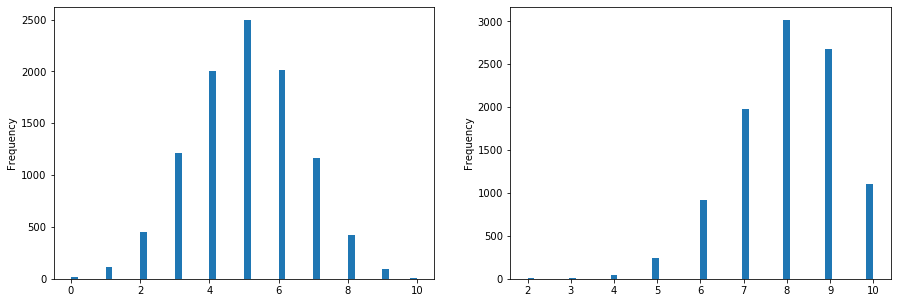

In [6]:
# toss a coin 10 times and assume the probability of getting heads is 50% for each time
# perform 10.000 experiments in which we flip a coin 10 times

import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

fig,ax=plt.subplots(1,2,figsize=(15,5))

binomial_data = stats.binom.rvs(size=10000, n=10, p=0.5, random_state=0)
pd.Series(binomial_data).plot(kind="hist", bins = 50, ax=ax[0]);

# this is a discrete distribution meaning the random variable can only assume discrete integer values
# looks like the normal distribution due to its symmetry, however this changes when the p value(probability) is updated.

binomial_data = stats.binom.rvs(size=10000, n=10, p=0.8, random_state=0)
pd.Series(binomial_data).plot(kind="hist", bins = 50, ax=ax[1]);

# results are a bit biased as heads will be tossed 80% of the time and therefore our distribution “shifted” to the right

In [7]:
# Cumulative distribution function: cdf()
# this function tells us the probability of a random variable assuming a value lower or equal to the one provided

# For example, what’s the probability of getting 7 head in 10 trials with a biased coin.

print(stats.binom.cdf(k=7,        # Probability of k = 7 heads or less
                n=10,       # In 10 trials
                p=0.8))      # And success probability 0.8


# probability of getting at least 7 heads in 10 trails
# this is calculated by simply seeing the probability of not getting 6 or less heads in trials
# express the “NOT” by subtracting the probability from 1
print(1 - stats.binom.cdf(k=6,        # Probability of k = 6 heads or less
                    n=10,       # In 10 trials
                    p=0.8))      # And success probability 0.8


# Probability mass function: pmf()
# this function check the proportion of observation at a certain point

# For example, probability of getting exactly 5 heads in 10 tries, with a biased coin.

print(stats.binom.pmf(k=5,        # Probability of k = 5 heads
                n=10,       # With 10 flips
                p=0.8))      # And success probability 0.8

0.3222004736
0.8791261184000001
0.02642411520000004


### Bernoulli Distribution
The __Bernoulli distribution__ is the discrete probability distribution of a random variable which takes the value 1 with probability $p$ and the value 0 with probability $q=1-p$, i.e. the probability distribution of any single experiment that asks a yes–no question; the question results in a boolean-valued outcome, a single bit of information whose value is success/yes/true/one with probability $p$ and failure/no/false/zero with probability $q$. It can be used to represent a (possibly biased) coin toss where 1 and 0 would represent "heads" and "tails" (or vice versa), respectively, and $p$ would be the probability of the coin landing on heads or tails, respectively. In particular, unfair coins would have $p\neq 1/2$.

The Bernoulli distribution is a special case of the binomial distribution where a single trial is conducted (so $N$ would be 1 for such a binomial distribution).

A __Bernoulli trial (or binomial trial)__ is a random experiment with exactly two possible outcomes, "success" and "failure", in which the probability of success is the same every time the experiment is conducted. 
Since a Bernoulli trial has only two possible outcomes, it can be framed as some "yes or no" question.

### Multinomial Distribution
The binomial distribution allows one to compute the probability of obtaining a given number of binary outcomes. For example, it can be used to compute the probability of getting 6 heads out of 10 coin flips. The flip of a coin is a binary outcome because it has only two possible outcomes: heads and tails. The __multinomial distribution__ can be used to compute the probabilities in situations in which there are more than two possible outcomes. The following formula gives the probability of obtaining a specific set of outcomes when there are $k$ possible outcomes for each event:

$$P(x)=\frac{n!}{n_1!n_2!...n_k!}p_1^{n_1}p_2^{n_2}...p_k^{n_k}$$
where:
* $P(x)$ is the probability,
* $n$ is the total number of events
* $n_1$ is the number of times Outcome 1 occurs
* $n_2$ is the number of times Outcome 2 occurs
* $n_3$ is the number of times Outcome 3 occurs
* $p_1$ is the probability of Outcome 1
* $p_2$ is the probability of Outcome 2
* $p_k$ is the probability of Outcome k

Note that the binomial distribution is a special case of the multinomial when k = 2.

For example, suppose that two chess players had played numerous games and it was determined that the probability that Player A would win is 0.40, the probability that Player B would win is 0.35, and the probability that the game would end in a draw is 0.25. The multinomial distribution can be used to answer questions such as: "If these two chess players played 12 games, what is the probability that Player A would win 7 games, Player B would win 2 games, and the remaining 3 games would be drawn?" 

$$P(x)=\frac{12!}{7!2!3!}(0.4)^{7}(0.35)^{2}(0.25)^{3}=0.0248$$

### Hypergeometric Distribution
The __hypergeometric distribution__ is used to calculate probabilities when sampling without replacement.

$$p=\frac{(_kC_x)(_{N-k}C_{n-x})}{_NC_n}$$
where:

* $k$ is the number of "successes" in the population
* $x$ is the number of "successes" in the sample
* $N$ is the size of the population
* $n$ is the number sampled
* $p$ is the probability of obtaining exactly x successes
* $_kC_x$ is the number of combinations of k things taken x at a time

The mean and standard deviation of the hypergeometric distribution are:

$$Mean=\frac{(n)(k)}{N}$$

$$sd=\sqrt{\frac{(n)(k)(N-k)(N-n)}{N^2(N-1)}}$$

For example, suppose you first randomly sample one card from a deck of 52. Then, without putting the card back in the deck you sample a second and then (again without replacing cards) a third. Given this sampling procedure, what is the probability that exactly two of the sampled cards will be aces (4 of the 52 cards in the deck are aces). In this example, k = 4 because there are four aces in the deck, x = 2 because the problem asks about the probability of getting two aces, N = 52 because there are 52 cards in a deck, and n = 3 because 3 cards were sampled. Therefore,

$$p=\frac{(_4C_2)(_{(52-4)}C_{(3-2)})}{_{52}C_3}=\frac{\frac{4!}{2!2!}\frac{48!}{47!1!}}{\frac{52!}{49!3!}}=0.013$$



### Poisson Distribution
The __Poisson Distribution__ is similar to the Normal Distribution but with an added factor of skewness. With a low value for the skewness, a poisson distribution will have relatively uniform spread in all directions just like the Normal. But when the skewness value is high in magnitude then the spread of the data will be different in different directions; in one direction it will be very spread and in the other it will be highly concentrated. 

The Poisson distribution can be used to calculate the probabilities of various numbers of "successes" or outcomes based on the mean number of successes. In order to apply the Poisson distribution, the various events must be independent. The Poisson distribution can be represented as:

$$p=\frac{e^{-\mu}\mu^x}{x!}$$
where:
* e is the base of natural logarithms (2.7183)
* μ is the mean number of "successes"
* x is the number of "successes"/outcomes

The Poisson distribution is the distribution of a count — the count of times something happened. The Poisson distribution is very useful for counting events over a period of time given the continuous rate of events occurring, such as the number of patients an hospital will receive on its Emergency Department in an hour. Therefore, this type of distribution can be thought of as the probability of the number of times an event is likely to occur, within a certain timeframe. 

For example, the mean number of calls to a fire station on a weekday is 8. In order to fetch the probability that on a given weekday there would be 11 calls (outcome), the problem can be solved using the following formula based on the Poisson distribution:

$$p=\frac{e^{-8}8^{11}}{11!}=0.072$$

The mean of the Poisson distribution is $\mu$. The variance is also equal to $\mu$. Thus, for this example, both the mean and the variance are equal to 8. 

### Geometric Distribution
The __Geometric distribution__ gives the probability that the first occurrence of success requires $k$ independent trials, each with success probability $p$. The general formula to calculate the probability of $k$ failures before the first success, where the probability of success is $p$ and the probability of failure is $q = 1 − p$, is:
$$Pr(Y=k)=(1-p)^k p=q^kp\ ,\ for\ k=0,1,2,3,...$$

The geometric distribution is an appropriate model if the following assumptions are true:
* The phenomenon being modelled is a sequence of independent trials.
* There are only two possible outcomes for each trial, often designated success or failure.
* The probability of success, p, is the same for every trial.

If these conditions are true, then the geometric random variable is the count of the number of failures before the first success. The possible number of failures before the first success is 0, 1, 2, 3, and so on. The geometric random variable Y is the number of failures before the first success.

For example, the probability that any given drug is effective (success) is p = 0.6. The probability that a drug will not be effective (fail) is q = 1 – p = 1 – 0.6 = 0.4. Here are probabilities of some possible outcomes:
* The first drug works. There are zero failures before the first success. Y = 0 failures. The probability P(zero failures before first success) is simply the probability that the first drug works.

$$Pr(Y=0)=q^0 p=(0.4)^0(0.6)=0.6$$

* The first drug fails, but the second drug works. There is one failure before the first success. Y= 1 failure. The probability for this sequence of events is p(first drug fails) X p(second drug is success) which is given by:

$$Pr(Y=1)=q^1 p=(0.4)^1(0.6)=0.24$$

* The first drug fails, the second drug fails, but the third drug works. There are two failures before the first success. Y= 2 failures. The probability for this sequence of events is p(first drug fails) X p(second drug fails) X p(third drug is success)

$$Pr(Y=2)=q^2 p=(0.4)^2(0.6)=0.096$$

Geometric distribution satisfies the important property of being __memoryless__, meaning that if a success has not yet occurred at some given point, the probability distribution of the number of additional failures does not depend on the number of failures already observed.

### Exponential Distribution
The __Exponential distribution__ (also known as the negative exponential distribution) is the probability distribution that describes the time between events in a __Poisson point process__, i.e., a process in which events occur continuously and independently at a constant average rate. It is a particular case of the gamma distribution and is the continuous analogue of the geometric distribution.

The exponential distribution can be parameterized by its mean $\alpha$ with the probability density function:

$$f(x)=\frac{1}{\alpha}e^{-\frac{x}{\alpha}}\ \ \ \ ,x>0$$

An exponential random variable $x$ can also be parameterized by its rate $\lambda$ via the probability density function:

$$f(x)=\lambda e^{-\lambda x}\ \ \ \ ,x>0$$

The exponential distribution is used in reliability to model the lifetime of an object which, in a statistical sense, does not age (for example, a fuse or light bulb). This property is known as the __memoryless property__. 

The exponential distribution is great for modeling scenarios like the time to wait for the arrival of next bus, knowing that there is a bus every 15 minute. The exponential distribution should come to mind when thinking of “time until event”, maybe “time until failure.” The exponential distribution is used in queueing theory to model the times between customer arrivals and the service times. The exponential distribution is used in survival analysis to model the lifetime of an organism or the survival time after treatment. 

The probability density function using the first parametrization with α = 0.5, 1, 2 is:

![ed](imgs/ed.PNG)

### Other Distributions
##### Gamma Distribution
https://en.wikipedia.org/wiki/Gamma_distribution
##### Beta Distribution
https://en.wikipedia.org/wiki/Beta_distribution

##### Various other distributions can be derived and mapped using these most common distributions.
http://www.math.wm.edu/~leemis/chart/UDR/UDR.html

## Hypothesis Testing
__Hypothesis__ is a proposed explanation for a phenomenon.

![ht1](imgs/ht1.PNG)

### Null Hypothesis $(H_0)$ & Alternative Hypothesis $(H_1)$
The __Null Hypothesis__, also known as the __Conjecture__, is the initial claim about a population of statistics. A null hypothesis is a type of hypothesis assumes that any kind of difference or significance observed in the data is due to chance, i.e. no statistical significance exists in a set of given observations. The null hypothesis attempts to show that no variation exists between variables or that a single variable is no different than its mean. It is presumed to be true until statistical evidence nullifies it for an alternative hypothesis. Experimenters typically design experiments to allow the null hypothesis to be rejected.

The opposite of the null hypothesis is known as the __Alternative Hypothesis__. The alternative hypothesis states whether the population parameter differs from the value of the population parameter stated in the conjecture. In practice, the p-value, or critical value, is stated in advance to determine how the required value to reject the null hypothesis.

For instance,
> Null hypothesis, $H_0$: The world is flat.
>
> Alternate hypothesis $H_1$: The world is round.

### Statistical Significance
__Statistical Significance__ is a statistical procedure that tests the viability of the null hypothesis. It refers to the claim that a result from data generated by testing or experimentation is not likely to occur randomly or by chance, but is instead likely to be attributable to a specific cause. When analyzing a data set and doing the necessary tests to discern whether one or more variables have an effect on an outcome, statistical significance helps support the fact that the results are real and not caused by luck or chance. Problems arise in tests of statistical significance because researchers are usually working with samples of larger populations and not the populations themselves. As a result, the samples must be representative of the population, so the data contained in the sample must not be biased in any way. Only random representative samples should be used in significance testing.

Sample size is an important component of statistical significance, the larger samples are less prone to flukes. The level at which one can accept whether an event is statistically significant is known as the __Significance Level__. Researchers use a test statistic known as the __P-Value__ to discern whether the event falls below the significance level; if it does, the result is statistically significant. The p-value is a function of the means and standard deviations of the data samples.

<div class="alert alert-info"><li>Given that the null hypothesis is true, if data (or more extreme data) are very unlikely, then the null hypothesis is rejected. On the other hand, if the data or more extreme data are not unlikely, then the null hypothesis is not rejected. If the null hypothesis is rejected, then the result of the test is said to be significant.   
<li>A statistically significant effect does not mean the effect is important. When an effect is significant, there is a confidence that the effect is not exactly zero. Finding that an effect is significant doesn't reveal about how large or important the effect is.</div>

### P-Value
The __P-Value__, also known as the __Critical Value__ is the level of marginal significance within a statistical hypothesis test representing the probability of the occurrence of a given event. The p-value approach to hypothesis testing uses the calculated probability to determine whether there is evidence to reject the null hypothesis. A smaller p-value means that there is stronger evidence in favor of the alternative hypothesis. The p-value is used as an alternative to rejection points to provide the smallest level of significance at which the null hypothesis would be rejected.

A low probability value casts doubt on the null hypothesis. In order to conclude that the null hypothesis is false, the probability value should be less than 0.05 (this value may vary to 0.01). When a researcher concludes that the null hypothesis is false, the researcher is said to have rejected the null hypothesis. The probability value below which the null hypothesis is rejected is called the __Alpha Level__ or simply $\alpha$.

![nh1.png](imgs/nh1.PNG)

#### Famous Example for Hypothesis Testing: Lady Tasting Tea
* Null Hypothesis $H_0$: The lady cannot tell if milk was poured first
* Alternative Hypothesis $H_1$: The lady can tell if milk was poured first
![ltt.png](imgs/ltt.PNG)

#### Example: Investment Strategy 
Alice sees that her investment strategy produces higher average returns than simply buying and holding a stock. The null hypothesis claims that there is no difference between the two average returns, and Alice has to believe this until she proves otherwise. Refuting the null hypothesis would require showing statistical significance, which can be found using a variety of tests. Therefore, the alternative hypothesis would state that the investment strategy has a higher average return than a traditional buy-and-hold strategy. The p-value is used to determine the statistical significance of the results. If Alice conducts one of these tests, such as a test using the normal model, and proves that the difference between her returns and the buy-and-hold returns is significant, or the p-value is less than or equal to 0.05, she can then refute the null hypothesis and accept the alternative hypothesis.

### Z-Test
A __Z-Test__ is a statistical test used to determine whether two population means are different when the variances are known and the sample size is large. The test statistic is assumed to have a normal distribution, and nuisance parameters such as standard deviation should be known in order for an accurate z-test to be performed.

The z-test is also a hypothesis test in which the z-statistic follows a normal distribution. The z-test is best used for __greater than 30 samples__ because, under the central limit theorem, as the number of samples gets larger, the samples are considered to be approximately normally distributed. The Z-Test also assumes that the sample is selected at random and the observations are independent.

#### Case Study for Hypothesis Testing and Rejection Region
There are two approaches for solving this scenario:
* Z-Test is conducted to determine z-score, probability is measured using z-table and compared against the value of $\alpha$ (usually 0.05).
* Rejection region is plotted using the z-score of the critical value ($\alpha$), Z-Test is conducted to determine z-score and compared.

|![wh](imgs/head.png)|![wh](imgs/head.png)|
|-|-|
|![ht](imgs/ht.PNG)|![rr](imgs/rr.PNG)|

The shaded region on the left tail of the distribution is the __Rejection Region__. If the point lies in this region, the null hypothesis is rejected and the alternative hypothesis is accepted.

#### Case Study for Proportion Testing
In __Proportion Testing__, the mean and standard deviation of the population is derived from the sample using proportions.

|![wh](imgs/head.png)|![wh](imgs/head.png)|
|-|-|
|![pt1](imgs/pt1.PNG)|![pt2](imgs/pt2.PNG)|

#### Case Study when the Null Hypothesis cannot be rejected
The null hypothesis is accepted provisionally because a hypothesis test doesn’t tell which hypothesis is true (the null or alternate hypothesis). The only thing is tests which determines whether there’s enough evidence in the data to reject the null hypothesis. _Failure to accept the alternate hypothesis doesn’t make the null hypothesis true_. For example, consider an experiment where a child is caught red-handed with a stolen cookie by his uncle.

> Null hypothesis ($H_0$): The child didn’t steal the cookie (innocent until proven guilty).
>
> Alternate hypothesis ($H_1$): The child did steal the cookie.

Uncle is pretty certain that the child stole the cookie. But after gathering all evidence, he didn’t found enough evidence to say for sure that the child is guilty. Therefore, there isn’t enough evidence in support of the alternate hypothesis that the child is guilty. In other words, the null hypothesis that the child is innocent in favor of alternative the hypothesis that the child is guilty can't be rejected. That doesn’t mean the child is innocent due to the lack of evidence to prove him guilty. Although the result fell into the acceptance region, his uncle doesn’t actually “accept” the null hypothesis of innocence. He just provisionally (perhaps begrudgingly) accept it and let the child off without punishment. Later on, he might find crumbs in their bed, leading him to revisit his findings. 

This subtle difference may seem pedantic, and in elementary statistics it’s usually not an important matter to stress. However, while planning to publish the results, it should never be stated as “accept the null hypothesis”, rather it can be either "provisionally accepted" or stated as "failed to reject null hypothesis".

### Errors in Hypothesis Testing

![eht](imgs/eht.PNG)

A __type I error__ is a kind of error that occurs during the hypothesis testing process when a null hypothesis is rejected incorrectly even though it is true and should not be rejected. This type I error is also known as "false positive", as it rejects an idea that should not have been rejected. For example, consider at the trail of an accused criminal. The null hypothesis is that the person is innocent, while the alternative hypothesis is that the person is guilty. A Type I error in this case would mean that the person is not found innocent and is sent to jail, despite actually being innocent.

A type I error is the false rejection of the null hypothesis. The probability of committing a type I error is equal to the level of significance (critical value) that was set for the hypothesis test. Therefore, if the level of significance is 0.05, there is a 5% chance a type I error may occur. Conversely, the probability of accepting the null hypothesis when it is true is equivalent to 1 minus the critical value.

A __type II error__ is a statistical term used within the context of hypothesis testing that describes the error that occurs when one fails to reject a null hypothesis that is actually false. The error rejects the alternative hypothesis, even though it does not occur due to chance. A type II error does not reject the null hypothesis, even though the alternative hypothesis is the true state of nature. A type II error confirms an idea that should have been rejected, claiming the two observances are the same, even though they are different. 

The probability of committing a type II error is equal to 1 minus the power of the test, also known as __beta__. The power of the test could be increased by increasing the sample size, which decreases the risk of committing a type II error. Assume the beta is calculated to be 0.025, or 2.5%. Therefore, the probability of committing a type II error is 2.5%.

## Student's T Distribution
The __T distribution__ (also called __Student’s T Distribution__) is a family of distributions that look almost identical to the normal distribution curve, only a bit shorter and fatter. A T distribution is a type of probability distribution that is appropriate for estimating population parameters for small sample sizes and unknown population variances. A T distribution has a smaller number of independent observations. 

![td](imgs/td.PNG)

$$f(t)=\frac{\Gamma(\frac{\nu+1}{2})}{\sqrt{\nu\pi}\ \Gamma(\frac{\nu}{2})}(1+\frac{t^2}{\nu})^{-\frac{\nu+1}{2}}$$
where $\nu$ is the degree of freedom (df) and $\Gamma$ is the gamma function.

A T distribution differs from the normal distribution by its degrees of freedom. The higher the degrees of freedom, the closer that distribution will resemble a standard normal distribution with a mean of 0, and a standard deviation of 1. For sample sizes larger than 30 (e.g. more degrees of freedom), the distribution is almost exactly like the normal distribution.

![df](imgs/df.PNG)

### T-Test
The T Distribution (and the associated t scores), are used in hypothesis testing for figuring out whether to accept or reject the null hypothesis. The __t-score__ (or __t-statistic__ or __t-value__) is a ratio between the difference between two groups and the difference within the groups. The larger the t score, the more difference there is between groups. The smaller the t score, the more similarity there is between groups. The t score formula is the sample mean minus the population mean divided by the quotient of the standard deviation of the sample and the square root of the sample size.

$$t=\frac{(x-\mu)}{\frac{s}{\sqrt \nu}}$$
where $s$ is the standard deviation of sample for $N$ samples, $\nu=N-1$.

When a sample of a population is sufficiently large, the sample will follow a normal distribution. A z-score can be calculated with a known population standard deviation. But when a sample is not large enough, or the population standard deviation is unknown, a t-score must be calculated as a basis for the T distribution. Z-tests are closely related to t-tests, but t-tests are best performed when an experiment has a small sample size. Also, t-tests assume the standard deviation is unknown, while z-tests assume it is known. If the standard deviation of the population is unknown, the assumption of the sample variance equaling the population variance is made.

<div class="alert alert-info"> <b>Note:</b> For small sample sizes (N), which correspond with smaller degrees of freedom (N - 1 for the 1-sample t test), the t-distribution has fatter tails. This is because the t distribution was specially designed to provide more conservative test results when analyzing small samples.  As the sample size (N) increases, the number of degrees of freedom increases, and the t-distribution approaches a normal distribution. </div>

#### Example for T-Test

|![head](imgs/head.png)|![head](imgs/head.png)|
|-|-|
|![tt1](imgs/tt1.PNG)|![tt2](imgs/tt2.PNG)|


### Degrees of Freedom (DF)
The __Degrees of Freedom (DF)__ of an estimate is the number of independent pieces of information on which the estimate is based. Degrees of freedom encompasses the notion that the amount of independent information limits the number of parameters that can be estimated. Typically, the degrees of freedom equals the sample size minus the number of parameters to be calculated during an analysis. It is usually a positive whole number.

Degrees of freedom also define the probability distributions for the test statistics of various hypothesis tests. For example, hypothesis tests use the t-distribution, F-distribution, and the chi-square distribution to determine statistical significance. Each of these probability distributions is a family of distributions where the degrees of freedom define the shape. Hypothesis tests use these distributions to calculate p-values. So, the DF are directly linked to p-values through these distributions.

In a general sense, DF are the number of observations in a sample that are free to vary while estimating statistical parameters. Consider an example where the mean is 6.7, and it is based on 10 values. Thus, the values of 10 numbers must sum to 67 based on the equation for the mean. The first nine numbers are independent and can take any value such that their sum is less than or equal to 67, however the last value X has no freedom to vary and is calculated using simple algebra as: ((Sum of nine numbers) + X = 67). Therefore, X is equal to 67-(Sum of nine numbers). If the sum of nine numbers is 65 (assume), then X=2.

X is not an independent piece of information because it cannot be any other value. Estimating the parameter, the mean in this case, imposes a constraint on the freedom to vary. The last value and the mean are entirely dependent on each other. Consequently, after estimating the mean, there are only 9 independent pieces of information even though our sample size is 10. Thus, there are N – 1 degrees of freedom, where N is the sample size or number of observations.

### Point Estimate & Confidence Interval
When the parameter being estimated is a single number, the estimate is called a __point estimate__. When the parameter being estimated is a range of scores, the estimate is called a __confidence interval__. The wider the confidence interval, the more uncertainty there is about the value of the parameter. The confidence interval can take any number of probabilities, with the most common being 95% or 99%.

A confidence interval is the probability that a value will fall between an upper and lower bound of a probability distribution. For example, given a 99% confidence interval, stock XYZ's return will fall between -6.7% and +8.3% over the next year. In layman's terms, there is a 99% confidence level that the returns of holding XYZ stock over the next year will fall between -6.7% and +8.3%. Statisticians use confidence intervals to measure uncertainty. A higher probability associated with the confidence interval means that there is a greater degree of certainty that the parameter falls within the bounds of the interval. Therefore, a higher confidence level indicates that the parameters must be broader to ensure that level of confidence.

### One-Tailed Test & Two-Tailed Test
The terms “one tailed” and “two tailed” can more precisely be defined as referring to where the rejection regions are located.

|![head](imgs/head.png)|![head](imgs/head.png)|
|-|-|
|![1tt](imgs/1tt.PNG)|![2tt](imgs/2tt.PNG)|

A __one-tailed test__ is a statistical test in which the critical area of a distribution is one-sided so that it is either greater than or less than a certain value, but not both. The region of rejection is on only one side of the sampling distribution in a one-tailed test. If the sample being tested falls into the one-sided critical area, the alternative hypothesis will be accepted instead of the null hypothesis. One-tailed test is also known as a __directional hypothesis__ or __directional test__. When using a one-tailed test, the analyst is testing for the possibility of the relationship in one direction of interest, and completely disregarding the possibility of a relationship in another direction. 

A one-tailed test has the entire 5% of the alpha level in one tail (in either the left, or the right tail). The right tailed test and the left tailed test are examples of one-tailed tests. They are called “one tailed” tests because the rejection region is only in one tail. A right tailed test (sometimes called an upper test) is where the hypothesis statement contains a greater than (>) symbol, i.e the inequality points to the right. In contrast, a left tailed test (also known as the low tailed test) is where the hypothesis statement contains a lesser than (<) symbol, i.e the inequality points to the left.

The null hypothesis is the measurement that the analyst hopes to reject. The alternative hypothesis is the claim made by the analyst that the portfolio manager performed better than the S&P 500. If the outcome of the one-tailed test results in rejecting the null, the alternative hypothesis will be supported. On the other hand, if the outcome of the test fails to reject the null, the analyst may carry out further analysis and investigation into the portfolio manager’s performance. To determine how the portfolio’s return on investment compares to the market index, the analyst must run an upper-tailed significance test in which extreme values fall in the upper tail (right side) of the normal distribution curve. The one-tailed test conducted in the upper or right tail area of the curve will show the analyst how much higher the portfolio return is than the index return and whether the difference is significant.

A test that is conducted to show whether the mean of the sample is significantly greater than and significantly less than the mean of a population is considered a __two-tailed test__. Here, the region of rejection is on both the sides of the sampling distribution, i.e. the critical area of a distribution is two-sided. If the sample being tested falls into either of the critical areas, the alternative hypothesis is accepted instead of the null hypothesis. In a two-tailed test, 5% of the alpha level is split between the two tails, (2.5%) in each tail. Moreover, the hypothesis statement contains an equal to (=) sign.

A two-tailed test can be used during certain production activities, such as with the production and packaging of candy at a particular facility. If the production facility designates 50 candies per bag as its goal, with an acceptable distribution of 45 to 55 candies, any bag found with an amount below 45 or above 55 is considered within the rejection range. If an unacceptable rejection rate is discovered, or an average deviating too far from the desired mean, adjustments to the facility or associated equipment may be required to correct the error. Regular use of two-tailed testing methods can help ensure production stays within limits over the long term.

#### Example for Two-Tailed Test

|![head](imgs/head.png?raw=true)|![head](imgs/head.png)|
|-|-|
|![tte1](imgs/tte1.PNG?raw=true)|![tte2](imgs/tte2.PNG)|


### Types of T-Tests
There are three types of T tests, and are categorized as dependent and independent T tests. The following flowchart can be used to determine which T test should be used based on the characteristics of the sample sets. The key items to be considered include whether the sample records are similar, the number of data records in each sample set, and the variance of each sample set.

![ft](imgs/ft.PNG)

#### Correlated (or Paired) T Test
The __correlated T test__ is performed when the samples typically consist of matched pairs of similar units, or when there are cases of repeated measures. For example, there may be instances of same patients being tested repeatedly - before and after taking a particular treatment. This method can also applies on cases where the samples are related in some manner or have matching characteristics, like a comparative analysis involving children, parents or siblings. Correlated or paired T tests are of _dependent type_, as these involve cases where the two sets of samples are related. The formula for computing the t-value and degrees of freedom for paired T test is:
$$t-value=\frac{mean1-mean2}{sp*\sqrt{\frac{2}{n}}}$$
where,
$$sp=\sqrt{\frac{var1^2+var2^2}{2}}$$
and
$$Degrees\ of\ freedom=(2n-2)$$

$mean1$ and $mean2$ are the average values of each of the sample sets, $var1$ and $var2$ represent the variance of each of the sample sets, $n$ is the number of records in each sample set, $sp$ is the pooled standard deviation.

#### Equal Variance (or pooled) T Test
The __equal variance T test__ is used when the number of samples in each groups is the same, or the variance of the two data sets is similar. The equal variance T test is an independent test as the selected samples are independent of each other – that is, the data sets in the two groups don’t refer to the same values. The following formula is used for calculating t-value and degrees of freedom for equal variance T test:
$$t-value=\frac{mean1-mean2}{sp*\sqrt{\frac{1}{n1}+\frac{1}{n2}}}$$
where,
$$sp=\sqrt{\frac{(n1-1)*var1^2+(n2-1)*var2^2}{n1+n2-2}}$$
and
$$Degrees\ of\ freedom=(n1+n2-2)$$

$n1$ and $n2$ are the number of records in each sample set.

#### Unequal Variance T Test
The __unequal variance T test__ is used when the number of samples in each group is different and the variance of the two data sets is also different. This test is also called the __Welch's t-test__. The following formula is used for calculating t-value and degrees of freedom for unequal variance T test:
$$t-value=\frac{mean1-mean2}{sp}$$
where,
$$sp=\sqrt{\frac{var1^2}{n1}+\frac{var2^2}{n2}}$$
and
$$Degrees\ of\ freedom=\frac{(\frac{var1^2}{n1}+\frac{var2^2}{n2})^2}{\frac{(\frac{var1^2}{n1})^2}{n1-1}+\frac{(\frac{var2^2}{n2})^2}{n2-1}}$$

<div class="alert alert-info">T-tests works best for two group comparisons. While comparing multiple groups, it gets tricky as many pairwise tests are needed and the likelihood of Type 1 error (alpha inflation) also increases. Therefore, for multiple groups, ANOVA is used.</div>

## Linear Regression

A dataset containing two variables is called __bivariate data__.

|![lra](imgs/lra.png)|![lrb](imgs/lrb.png)|
|-|-|

Regression not only gives us the equation of this line, it also signals how reliable the line is. $R^2$ defines how does the line represent the data. It also determines how much the variance in the data is captured by the line. 

$$R^2 =\frac{Explained\ Variance}{Total\ Variance}$$

|![a](imgs/head.png)|![a](imgs/head.png)|
|-|-|
|![lrc](imgs/lrc.png)|![lrd](imgs/lrd.png)|

A higher $R^2$ value indicates that a lot of the underlying variance is captured. (Better-fit line)

There is a perfect linear relationship between two variables if a scatterplot of the points falls on a straight line. The relationship is linear even if the points diverge from the line as long as the divergence is random rather than being systematic.

### Minimising Least Square Error

|![a](imgs/head.png)|![a](imgs/head.png)|
|-|-|
|![lre](imgs/lre.png)|![lrf](imgs/lrf.png)|
|![lrg](imgs/lrg.png)|![lrh](imgs/lrh.png)|

__Residuals__ of a regression are the difference between actual and fitted values of the dependent variable.

Assumptions about Residuals during __Ordinary Least Squares (OLS)__ Method:
* Have Zero Mean
* Have constant variance
* Be independent of each other
* Be independent of x
* Be normally distributed

### Prediction using Regression

|![lri](imgs/lri.png)|![lrj](imgs/lrj.png)|
|-|-|

### Basic Example for Linear Regression

slope: 1.944864      intercept: 0.268578       std_err: 0.41235
r-squared: 0.7355    p_value: 0.00151


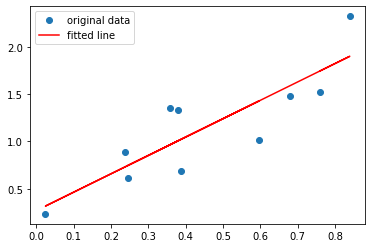

In [8]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

np.random.seed(12345678)
x = np.random.random(10)
y = 1.6*x + np.random.random(10)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f      intercept: %f" % (slope, intercept),"      std_err:",round(std_err,5))

print("r-squared: {}" .format(round(r_value**2,5)),"   p_value:",round(p_value,5))

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

## Covariance
Covariance is a measure of the relationship between random variables. The metric primarily evaluates how much the variables change together. Unlike the correlation coefficient, covariance is measured in units. The units are computed by multiplying the units of the two variables. The coefficient can take any positive or negative values. The values are interpreted as follows:

* Positive covariance: Indicates that two variables tend to move in the same direction.
* Negative covariance: Reveals that two variables tend to move in the inverse direction.

In finance, the concept of covariance is primarily used in portfolio theory. One of its most common applications in portfolio theory is the diversification method using the covariance between the assets in the portfolio. By choosing the assets that do not exhibit a high positive covariance with each other, the undiversifiable risk can be partially eliminated.

The covariance formula is similar to the formula for correlation and deals with the calculation of data points from the average value in a dataset. For example, the covariance between two random variables X and Y can be calculated using the following formula (for population):

$$Cov(X,Y)=\frac{\sum(X_i-\bar X)(Y_j-\bar Y)}{n}$$
For a sample covariance, the formula is slightly adjusted:
$$Cov(X,Y)=\frac{\sum(X_i-\bar X)(Y_j-\bar Y)}{n-1}$$
where:
* $X_i$ – the values of the X-variable
* $Y_j$ – the values of the Y-variable
* $\bar X$ – the mean (average) of the X-variable
* $\bar Y$ – the mean (average) of the Y-variable
* $n$ – the number of the data points

## Pearson Correlation 
The Pearson product-moment correlation coefficient is a measure of the strength of the linear relationship between two variables. It is referred to as __Pearson's correlation__ or simply as the __correlation coefficient__. If the relationship between the variables is not linear, then the correlation coefficient does not adequately represent the strength of the relationship between the variables.

The symbol for Pearson's correlation is $\rho$ when it is measured in the population and $r$ when it is measured in a sample. 

Pearson's $r$ can range from -1 to 1. An $r$ of -1 indicates a perfect negative linear relationship between variables, an $r$ of 0 indicates no linear relationship between variables, and an $r$ of 1 indicates a perfect positive linear relationship between variables. A critical property of Pearson's $r$ is that it is unaffected by linear transformations. This means that multiplying a variable by a constant and/or adding a constant does not change the correlation of that variable with other variables.

|![c](imgs/c.png)|![wh](imgs/wh.png)|
|-|-|

The asterisks here just after the term independent exists because XY variables can have 0 correlation, but yet not be independent. Independent variables always have 0 correlation, but the reverse is not necessarily true. 

Pearson's correlation is computed as:
$$r=\frac{\sum {xy}}{\sqrt {\sum x^2 \sum y^2}}$$

where $x=(X-\mu_X)$ and $y=(Y-\mu_Y)$, $x$ & $y$ are mean deviation scores

$$r=\frac{\sum {(X-\mu_X)(Y-\mu_Y)}}{\sqrt {\sum (X-\mu_X)^2 \sum (Y-\mu_Y)^2}}$$

An alternative computational formula that avoids the step of computing deviation scores is:

$$r=\frac{\sum{XY}-\frac{\sum X \sum Y}{N}}{\sqrt{\sum{X^2}-\frac{(\sum X)^2}{N}} \sqrt{\sum{Y^2}-\frac{(\sum Y)^2}{N}}}$$


The concepts of covariance and correlation are related to each other. Both values primarily assess the relationship between variables. However, the two measures are different and cannot be used interchangeably. The closest analogy to the relationship between covariance and correlation is the relationship between the variance and standard deviation.

Covariance measures the total variation of two random variables from their expected values. Using covariance, only the direction of the relationship (whether the variables tend to move in tandem or the variables show an inverse relationship) is determined. However, it does not indicate the strength of the relationship, as well as the dependency between the variables.

On the other hand, correlation measures the strength of the relationship between variables. Correlation is the scaled measure of covariance. Besides, it is dimensionless. In other words, the correlation coefficient is always a pure value and not measured in any units.

The relationship between covariance and correlation can be expressed using the formula below:

$$r(X,Y)=\frac{Cov(X,Y)}{\sigma_X\sigma_Y}$$
where:
* $r(X,Y)$ – the correlation between the variables X and Y
* $Cov(X,Y)$ – the covariance between the variables X and Y
* $\sigma_X$ – the standard deviation of the X-variable
* $\sigma_Y$ – the standard deviation of the Y-variable

###  Variance Sum Law
The variance sum law is an expression for the variance of the sum of two variables.
* The _variance of the sum_ of two uncorrelated variables (independent variables) X and Y is equal to the variance of X plus the variance of Y. Also, the _variance of the difference_ between two uncorrelated variables (independent variables) X and Y is equal to the variance of X plus the variance of Y.
$$\sigma_{X\pm Y}^2=\sigma_{X}^2+\sigma_{Y}^2$$
* When X and Y are correlated, the variance of the sum or difference between X and Y can be written as follows:
$$\sigma_{X\pm Y}^2=\sigma_{X}^2+\sigma_{Y}^2 \pm 2 \rho \sigma_X \sigma_Y$$
where $\rho$ is the correlation between X and Y in the population.
* If the variances and the correlation are computed in a sample, then the following notation is used to express the variance sum law:
$$\sigma_{X\pm Y}^2=\sigma_{X}^2+\sigma_{Y}^2 \pm 2r \sigma_X \sigma_Y$$

### Spearman's Rank-Order Correlation
__Spearman's correlation coefficient__, ($\rho$, also signified by $r_s$) determines the strength and direction of the monotonic relationship between  two variables rather than the strength and direction of the linear relationship between two variables, which is what Pearson's correlation determines. It is also known as __Rank correlation__, relative position (rank) is considered instead of the variables values.

A __monotonic relationship__ is a relationship that does one of the following:
* as the value of one variable increases, the value of the other variable also increases.
* as the value of one variable increases, the other variable value decreases.

![monotonic](imgs/monotonic.PNG)

Monotonic relationship is important as compared to Spearman's correlation because monotonicity is "less restrictive" than that of a linear relationship. For example, the middle image above shows a relationship that is monotonic, but not linear.

The data containing two variables are first ranked separately based on their values with the highest value labelled as 1. If the data contains two identical values (called a __tie__), the average of the ranks that they would have otherwise occupied is measured and assigned to each of these tied scores, the original ranks are omitted. For example, if there is a tie between rank 5 an 6, then the average 5.5 is assigned to both of these values, and the original ranks 5 and 6 are omitted.

When the data does not have tied ranks, Spearman's correlation coefficient is determined as:
$$\rho=1-\frac{6\sum d^2_i}{n(n^2-1)}$$
where $d_i$ = difference in paired ranks and $n$ = number of cases.

The Spearman correlation coefficient, $r_s$, can take values from +1 to -1. A $r_s$ of +1 indicates a perfect association of ranks, a $r_s$ of zero indicates no association between ranks and a $r_s$ of -1 indicates a perfect negative association of ranks. The closer $r_s$ is to zero, the weaker the association between the ranks.

For example, in order to calculate a Spearman rank-order correlation on marks without any ties:
![mo1](imgs/mo1.PNG)
Assigning ranks to both the columns and determining the difference:
![mo2](imgs/mo2.PNG)
where $d$=difference between ranks and $d^2$ = difference squared

$$\sum d_i^2=25+1+9+1+16+1+1=54$$
$n=10$ as there are 10 records
$$\rho=1-\frac{6\sum d^2_i}{n(n^2-1)}=1-\frac{6x54}{10(10^2-1)}=1-\frac{324}{990}=1-0.33=0.67$$

### Correlation Matrix
A __correlation matrix__ is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used as a way to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

The line of 1's going from the top left to the bottom right is the main diagonal, which shows that each variable always perfectly correlates with itself. This matrix is symmetrical, with the same correlation shown above the main diagonal being a mirror image of those below the main diagonal.

### Kendall’s Tau
__Kendall’s Tau__ is a non-parametric measure of relationships between columns of ranked data. The Tau correlation coefficient returns a value of 0 to 1, where:
* 0 is no relationship
* 1 is a perfect relationship

A quirk of this test is that it can also produce negative values (i.e. from -1 to 0). Unlike a linear graph, a negative relationship doesn’t mean much with ranked columns. Remove the negative sign while interpreting Tau (by switching the columns around).

Tau-A and Tau-B are usually used for square tables (with equal columns and rows), Tau-B will adjust for tied ranks. Tau-C is usually used for rectangular tables. For square tables, Tau-B and Tau-C are essentially the same. 

$$Kendall’s\ Tau = \frac{C – D}{C + D}$$

where $C$ is the number of concordant pairs and $D$ is the number of discordant pairs.

For calculating statistical significance of the result, this formula is used to get a z-value:

$$z=\frac{3T\sqrt{N(N-1)}}{\sqrt{2(2N+5)}}$$

For example, two interviewers ranked 12 candidates (A through L) for a position. The results from most preferred to least preferred are:
* Interviewer 1: ABCDEFGHIJKL
* Interviewer 2: ABDCFEHGJILK

For calculation of the Kendall Tau correlation, the rankings for Interviewer 1 should be in ascending order (from least to greatest). Count the number of concordant and discordant pairs.
![kt](imgs/kt.PNG)
__Concordant pairs__ are how many larger ranks are below a certain rank. __Discordant pairs__ are how many smaller ranks are below a certain rank.

$$Kendall’s\ Tau = \frac{C – D}{C + D}=\frac{61-5}{61+5}=0.85$$

$$z=\frac{3(0.85)\sqrt{12(12-1)}}{\sqrt{2(2(12)+5)}}=3.846$$

Finding the area for a z-score of 3.85 on a z-table gives an area of .0001 — a tiny probability value which tells that this result is statistically significant.

In [9]:
import pandas as pd

# importing data
url="http://users.stat.ufl.edu/~winner/data/epl_2015_ht_wt.csv"
df=pd.read_csv(url,encoding='latin-1')
df.head()

,Team,Player,Number,Position,Age,Height,Weight
0,Arsenal,Aaron Ramsey,16,M,24,70,168
1,Arsenal,Alex Oxlade-Chamberlain,15,M,22,71,154
2,Arsenal,Alexis Sánchez,17,F,26,67,154
3,Arsenal,Calum Chambers,21,D,20,72,146
4,Arsenal,Danny Welbeck,23,F,24,72,161


Covariance: 34.43
Correlation: 0.70

Data is ranked:
    Height  Weight
0   154.0   271.0
1   221.5   115.0
2    24.0   115.0
3   284.5    38.0
4   284.5   196.0


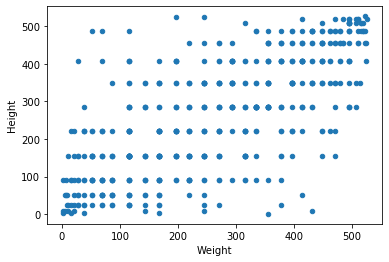

In [10]:
covariance = df['Height'].cov(df['Weight'])
print('Covariance: %0.2f' % covariance)

correlation = df['Height'].corr(df['Weight'])
print('Correlation: %0.2f' % correlation)

print("\nData is ranked:\n",df[["Height", "Weight"]].rank().head())
df[["Height", "Weight"]].rank().plot.scatter(x ="Weight", y="Height"); # positive correlation between two points

Corelation matrix:
           Number       Age    Height    Weight
Number  1.000000 -0.372662 -0.062441 -0.123073
Age    -0.372662  1.000000  0.156273  0.276137
Height -0.062441  0.156273  1.000000  0.697119
Weight -0.123073  0.276137  0.697119  1.000000


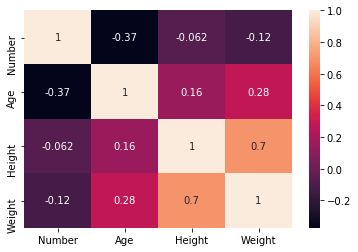

In [11]:
import seaborn as sns

print("Corelation matrix:\n",df.corr())
sns.heatmap(df.corr(), annot=True); # for visualizing 

## Reliability

The __reliability__ of a test is related to whether a retest would result in approximately the same score. It is defined as the correlation between two parallel forms of the test. Every test score can be thought of as the sum of two independent components, the true score and the error score. This can be written as:

$$y_{test}=y_{true}+y_{error}$$
From Variance Sum Law:
$$\sigma^2_{test}=\sigma^2_{true}+\sigma^2_{error}$$

The reliability of a test $r_{test,test}$ is the ratio of true score variance to test score variance. 

$$r_{test,test}=\frac{\sigma^2_{true}}{\sigma^2_{test}}=\frac{\sigma^2_{true}}{\sigma^2_{true}+\sigma^2_{error}}$$

The reliability of a test does not show directly how close the test scores are to the true scores. The standard deviation indicates how much the test scores vary from the true score. This standard deviation is called the standard error of measurement.

$$s_{measurement}=s_{test}\sqrt{1-r_{test,test}}$$

where $s_{measurement}$ is the standard error of measurement, $s_{test}$ is the standard deviation of the test scores, and $r_{test,test}$ is the reliability of the test. Taking the extremes, if the reliability is 0 then the standard error of measurement is equal to the standard deviation of the test; if the reliability is perfect 1 then the standard error of measurement is 0.

Two basic ways of increasing reliability are to: 
1. improve the quality of the items
2. increase the number of items

Increasing the number of items increases reliability in the manner shown by the following formula:

$$r_{new,new}=\frac{kr_{test,test}}{1+(k-1)r_{test,test}}$$

where $k$ is the factor by which the test length is increased, $r_{new,new}$ is the reliability of the new longer test, and $r_{test,test}$ is the current reliability. For example, if a test with 50 items has a reliability of .70 then the reliability of a test that is 1.5 times longer (75 items) would be calculated as follows:

$$r_{new,new}=\frac{(1.5)(0.7)}{1+(1.5-1)(0.7)}=0.78$$

Thus increasing the number of items from 50 to 75 would increase the reliability from 0.70 to 0.78. It is important to note that this formula assumes the new items have the same characteristics as the old items. Obviously adding poor items would not increase the reliability as expected and might even decrease the reliability.

Chronbach's $\alpha$ is also a common measure of reliability.

# Appendix
![set1.png](imgs/set1.png)
![set2.png](imgs/set2.png)
![set3.png](imgs/set3.png)
![set4.png](imgs/set4.png)
![set5.png](imgs/set5.png)
![set6.png](imgs/set6.png)
![set7.png](imgs/set7.png)
![set8.png](imgs/set8.png)
![set9.png](imgs/set9.png)
![set10.png](imgs/set10.png)
![set11.png](imgs/set11.png)